In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset
Dataset Details:
ORL face database composed of 400 images of size 112 x 92. The images were taken at different times, lighting and facial expressions. The faces are in an upright position in frontal view, with a slight left-right rotation.

Link to the Dataset: https://www.dropbox.com/s/i7uzp5yxk7wruva/ORL_faces.npz?dl=0

In [2]:
data = np.load('ORL_faces.npz')

In [3]:
data.files

['testY', 'testX', 'trainX', 'trainY']

In [4]:
x_train = data['trainX']
x_test = data['testX']

y_train = data['trainY']
y_test = data['testY']

print('Train data size ', y_train.shape)
print('Test data size ', y_test.shape)

Train data size  (240,)
Test data size  (160,)


In [5]:
y_train

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18

In [6]:
y_test

array([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,
        6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
       10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12,
       12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14,
       14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 19,
       19, 19, 19, 19, 19, 19, 19], dtype=uint8)

Total 400 images.
There are 20 people, 12 images per person in Training set and 8 images per person in the Testing set.

## Normalizing the dataset.

In [7]:
x_train = np.array(x_train, dtype='float32')/255
x_test = np.array(x_test, dtype='float32')/255

### Spliting the data into train and validation

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size=0.1,
                                                  random_state=99)

Reshaping all the images to size 112x92

In [10]:
image_size = (112, 92, 1)
batch_size = 512

x_train = x_train.reshape(x_train.shape[0], *image_size)
x_test = x_test.reshape(x_test.shape[0], *image_size)
x_val = x_val.reshape(x_val.shape[0], *image_size)

## Build Deep CNN model

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [12]:
face_rec_model = Sequential()

face_rec_model.add(Conv2D(filters=36, 
                          kernel_size=3,
                          activation='relu',
                          input_shape= image_size))

face_rec_model.add(Conv2D(filters=36, 
                          kernel_size=3,
                          activation='relu',
                          input_shape= image_size))

face_rec_model.add(MaxPooling2D(pool_size=2))

face_rec_model.add(Conv2D(filters=64, 
                          kernel_size=3,
                          activation='relu',
                          input_shape= image_size))

face_rec_model.add(Conv2D(filters=64, 
                          kernel_size=3,
                          activation='relu',
                          input_shape= image_size))

face_rec_model.add(MaxPooling2D(pool_size=2))

face_rec_model.add(Flatten())

face_rec_model.add(Dense(1024, activation='relu'))
face_rec_model.add(Dropout(0.5))
face_rec_model.add(Dense(512, activation='relu'))
face_rec_model.add(Dropout(0.4))

face_rec_model.add(Dense(20, activation='softmax'))

In [13]:
face_rec_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 110, 90, 36)       360       
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 88, 36)       11700     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 54, 44, 36)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 42, 64)        20800     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 40, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 20, 64)       0         
 2D)                                                    

In [14]:
face_rec_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

In [15]:
callback = EarlyStopping(monitor='loss', patience=3)

In [16]:
history = face_rec_model.fit(np.array(x_train), np.array(y_train),
                             batch_size=batch_size,
                             epochs=150,
                             verbose=2,
                             validation_data=(np.array(x_val), np.array(y_val)),
                             callbacks=[callback]
                             )

Epoch 1/150
1/1 - 21s - loss: 2.9956 - accuracy: 0.0463 - val_loss: 2.9941 - val_accuracy: 0.1250 - 21s/epoch - 21s/step
Epoch 2/150
1/1 - 13s - loss: 2.9941 - accuracy: 0.0926 - val_loss: 3.0013 - val_accuracy: 0.1250 - 13s/epoch - 13s/step
Epoch 3/150
1/1 - 13s - loss: 2.9766 - accuracy: 0.0602 - val_loss: 3.0072 - val_accuracy: 0.0417 - 13s/epoch - 13s/step
Epoch 4/150
1/1 - 11s - loss: 2.9862 - accuracy: 0.1204 - val_loss: 3.0117 - val_accuracy: 0.0417 - 11s/epoch - 11s/step
Epoch 5/150
1/1 - 11s - loss: 2.9758 - accuracy: 0.0556 - val_loss: 3.0155 - val_accuracy: 0.0417 - 11s/epoch - 11s/step
Epoch 6/150
1/1 - 11s - loss: 2.9611 - accuracy: 0.0602 - val_loss: 3.0209 - val_accuracy: 0.0417 - 11s/epoch - 11s/step
Epoch 7/150
1/1 - 11s - loss: 2.9531 - accuracy: 0.0787 - val_loss: 3.0262 - val_accuracy: 0.0000e+00 - 11s/epoch - 11s/step
Epoch 8/150
1/1 - 11s - loss: 2.9489 - accuracy: 0.0741 - val_loss: 3.0315 - val_accuracy: 0.0000e+00 - 11s/epoch - 11s/step
Epoch 9/150
1/1 - 11s - 

In [17]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Model Evaluation

In [18]:
eval = face_rec_model.evaluate(np.array(x_test), np.array(y_test), verbose=0)

print('Test loss ', eval[0])
print('Test Acc ', eval[1])

Test loss  0.21071676909923553
Test Acc  0.949999988079071


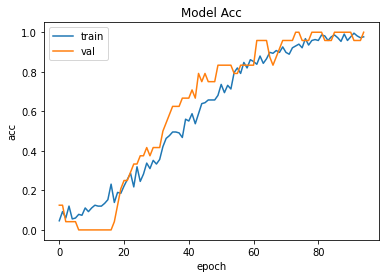

In [19]:
plt.title('Model Acc')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train', 'val'])
plt.show()

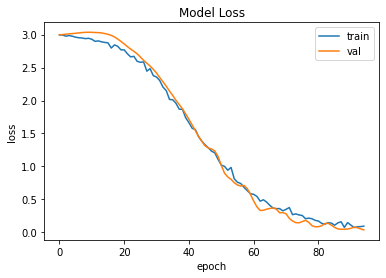

In [20]:
plt.title('Model Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

import seaborn as sns

from keras.utils import np_utils

In [22]:
pred = np.array(face_rec_model.predict(x_test))

y_pred = np.argmax(face_rec_model.predict(x_test), axis=-1)

In [23]:
acc_score = accuracy_score(y_test, y_pred)
print('Acc Score ', acc_score)

Acc Score  0.95


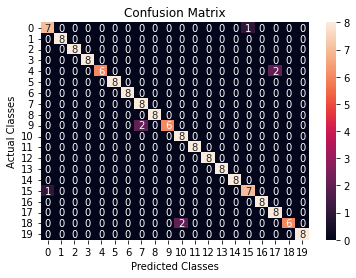

In [24]:
cmatrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cmatrix, annot=True)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Classes')
ax.set_ylabel('Actual Classes')

plt.show()